In [ ]:
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [ ]:
df['district'].value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

In [ ]:
df['size'] = df['size'].astype('float64')

ValueError: ignored

In [ ]:
df[['rooms', 'level', 'max_levels']] = df[['rooms', 'level', 'max_levels']].astype('float64')

In [ ]:
chosen = df[df['size'] == 'Площадьземли:1сот']
chosen

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4.0,Площадьземли:1сот,3.0,5.0,150000


In [ ]:
df = df.drop(index=5347)

In [ ]:
df['size'] = df['size'].astype('float64')

In [ ]:
df['price'] = df['price'].astype('float64')

ValueError: ignored

In [ ]:
chosen_p = df[df['price'] == 'Договорная']
chosen_p

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3.0,119.0,3.0,9.0,Договорная
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4.0,160.0,4.0,9.0,Договорная
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3.0,105.0,5.0,6.0,Договорная
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3.0,90.0,6.0,8.0,Договорная
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2.0,48.0,4.0,4.0,Договорная
...,...,...,...,...,...,...,...
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1.0,38.7,3.0,8.0,Договорная
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2.0,51.0,3.0,4.0,Договорная
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6.0,208.0,1.0,7.0,Договорная
7403,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2.0,35.0,2.0,9.0,Договорная


In [ ]:
df = df.drop(chosen_p.index)

In [ ]:
df['price'] = df['price'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7465 non-null   object 
 1   district    7465 non-null   object 
 2   rooms       7465 non-null   float64
 3   size        7465 non-null   float64
 4   level       7465 non-null   float64
 5   max_levels  7465 non-null   float64
 6   price       7465 non-null   float64
dtypes: float64(5), object(2)
memory usage: 466.6+ KB


In [ ]:
correlation = df['max_levels'].corr(df['level'])
correlation

0.5936935798742202

In [ ]:
error_price = df[df['price'] < 1000]
error_price

,location,district,rooms,size,level,max_levels,price
7224,"город Ташкент, Учтепинский район, Чиланзар-11",Учтепинский,2.0,51.0,2.0,4.0,2.0


In [ ]:
df = df.drop(index=7224)

In [ ]:
error_price_max = df[df['price'] > 1000000]
error_price_max

,location,district,rooms,size,level,max_levels,price
330,"город Ташкент, Яшнободский район, 1-й переулок...",Яшнободский,2.0,68.0,5.0,8.0,1666000.0
1744,"город Ташкент, Олмазорский район, Toshmi",Олмазорский,3.0,84.0,1.0,5.0,3780000.0
5903,"город Ташкент, Учтепинский район, Chtepa Fozil...",Учтепинский,4.0,72.0,2.0,5.0,52000000.0
6133,"город Ташкент, Юнусабадский район, город Ташке...",Юнусабадский,3.0,42.0,3.0,4.0,1344000.0
6517,"город Ташкент, Юнусабадский район, Юнусабад 5к...",Юнусабадский,3.0,80.0,8.0,9.0,4240000.0
6952,"город Ташкент, Шайхантахурский район, Алишера ...",Шайхантахурский,3.0,114.0,5.0,7.0,15504000.0
7081,"город Ташкент, Чиланзарский район, Тирсакобод",Чиланзарский,2.0,85.0,2.0,3.0,6630000.0
7296,"город Ташкент, Яшнободский район, Садыка Азимо...",Яшнободский,4.0,96.0,2.0,5.0,5568000.0
7466,"город Ташкент, Чиланзарский район, 1-й проезд ...",Чиланзарский,2.0,42.0,1.0,3.0,1470000.0


In [ ]:
df = df.drop(error_price_max.index)

In [ ]:
df['district'].value_counts()

Чиланзарский         1629
Мирзо-Улугбекский    1368
Юнусабадский          875
Учтепинский           873
Мирабадский           772
Яккасарайский         650
Яшнободский           466
Шайхантахурский       373
Олмазорский           266
Сергелийский          160
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

In [ ]:
housing = df[df.district=='Чиланзарский']
housing.head()

,location,district,rooms,size,level,max_levels,price
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2.0,42.0,4.0,4.0,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3.0,65.0,1.0,4.0,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3.0,70.0,3.0,5.0,55000.0
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1.0,28.0,1.0,4.0,25500.0
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1.0,30.0,2.0,4.0,21200.0


In [ ]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7504    70.0
7522    20.0
7533    32.0
7545    70.0
7564    30.0
Name: size, Length: 1629, dtype: float64

In [ ]:
Y = housing['price']
Y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7504    48000.0
7522    18500.0
7533    28000.0
7545    49800.0
7564    22914.0
Name: price, Length: 1629, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

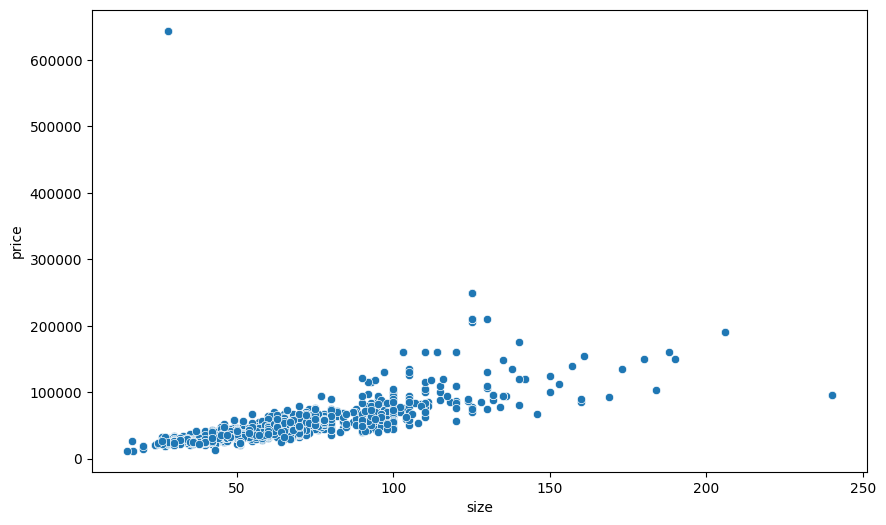

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

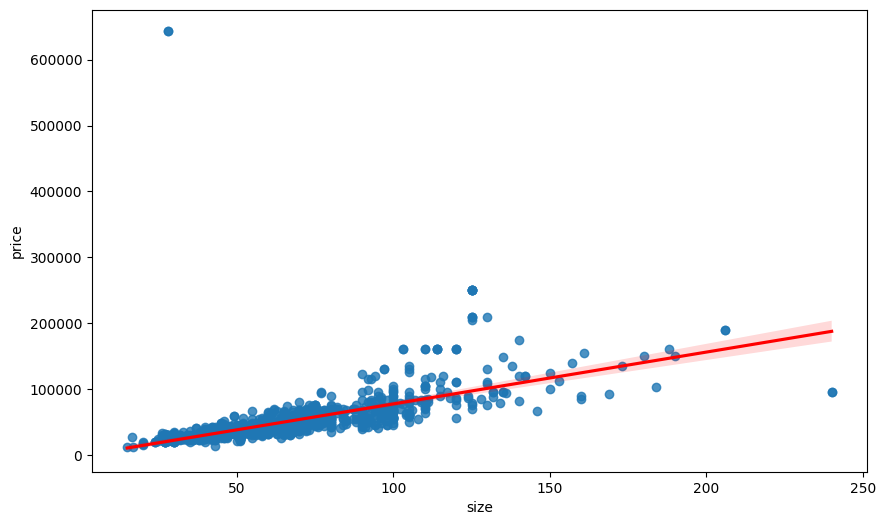

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=housing, x='size', y='price', line_kws={'color': 'red'})
plt.show()

In [ ]:
x_mean = X.mean()

In [ ]:
x_mean

62.295310006138735

In [ ]:
y_mean = Y.mean()

In [ ]:
y_mean

47606.42111724985

In [ ]:
x = X.map(lambda x: x-x_mean)

In [ ]:
x

2      -20.29531
3        2.70469
4        7.70469
5      -34.29531
6      -32.29531
          ...   
7504     7.70469
7522   -42.29531
7533   -30.29531
7545     7.70469
7564   -32.29531
Name: size, Length: 1629, dtype: float64

In [ ]:
y = Y.map(lambda x: x-y_mean)

In [ ]:
y

2      -10606.421117
3        1893.578883
4        7393.578883
5      -22106.421117
6      -26406.421117
            ...     
7504      393.578883
7522   -29106.421117
7533   -19606.421117
7545     2193.578883
7564   -24692.421117
Name: price, Length: 1629, dtype: float64

In [ ]:
x_y = x*y

In [ ]:
x_y

2       2.152606e+05
3       5.121544e+03
4       5.696523e+04
5       7.581466e+05
6       8.528036e+05
            ...     
7504    3.032403e+03
7522    1.231065e+06
7533    5.939826e+05
7545    1.690085e+04
7564    7.974494e+05
Length: 1629, dtype: float64

In [ ]:
x_y_sum = x_y.sum()

In [ ]:
x_y_sum

890154471.0573357

In [ ]:
x_sq = np.square(x)

In [ ]:
x_sq

2        411.899608
3          7.315348
4         59.362248
5       1176.168288
6       1042.987048
           ...     
7504      59.362248
7522    1788.893249
7533     917.805808
7545      59.362248
7564    1042.987048
Name: size, Length: 1629, dtype: float64

In [ ]:
x_sq_sum = x_sq.sum()

In [ ]:
x_sq_sum

1130590.3347684469

In [ ]:
tilda_1 = x_y_sum / x_sq_sum

In [ ]:
tilda_1

787.3359993296298

In [ ]:
tilda_0 = y_mean - tilda_1*x_mean

In [ ]:
tilda_0

-1440.9190399824802

In [ ]:
y_predict = tilda_0 + tilda_1*45

In [ ]:
y_predict

33989.20092985086

In [ ]:
Xmean = np.mean(X)
Ymean = np.mean(Y)

In [ ]:
theta1 = sum((X-Xmean)*(y-Ymean))/sum((X-Xmean)**2)
print(f"{theta1}")

787.3359993296345


In [ ]:
theta0 = Ymean - theta1*Xmean
print(f"{theta0=}")

theta0=-1440.9190399827785


In [ ]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")

x_test=array([ 94.,  77.,  40.,  46.,  66., 104.,  70.,  74.,  98.,  45.])
y_test=array([66000., 47500., 38500., 32000., 50500., 60000., 51000., 50000.,
       53000., 37000.])


In [ ]:
y_predict = theta0 + theta1*x_test
print(f"{y_predict=}")

y_predict=array([72568.664897  , 59183.9529084 , 30052.5209332 , 34776.53692918,
       50523.25691577, 80442.0248903 , 53672.60091309, 56821.94491041,
       75718.00889432, 33989.20092985])


In [ ]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

MAE=8516.526939542451


In [ ]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=11204.74302990586


In [ ]:
housing.shape

(1629, 7)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [ ]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=833.6344671079719
theta0=-5091.914513976364


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
correlation_with_sales = df.corrwith(df['Sales'])

In [ ]:
correlation_with_sales

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
rek = df[['TV', 'Sales']]

In [ ]:
rek

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(rek, test_size=0.10, random_state=42)
X_train = train_set.drop("Sales", axis=1)
y = train_set["Sales"].copy()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

LR_model = LinearRegression()

LR_model.fit(X_train, y)


X_test = test_set.drop("Sales", axis=1)
y_test = test_set["Sales"].copy()

predictions = LR_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 2.037955356968121
Mean Squared Error (MSE): 6.302018984115436


In [ ]:
rek_test = X_train.sample(5)
rek_test

,TV
196,94.2
61,261.3
176,248.4
113,209.6
67,139.3


In [ ]:
rek_label = y.loc[rek_test.index]
rek_label

196    14.0
61     24.2
176    20.2
113    20.9
67     13.4
Name: Sales, dtype: float64

In [ ]:
predicted_data = LR_model.predict(rek_test)
predicted_data

array([12.23841028, 21.45107288, 20.73986194, 18.60071587, 14.72489193])

In [ ]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': rek_label})

,Prognoz,Real baxosi
196,12.238410,14.0
61,21.451073,24.2
176,20.739862,20.2
113,18.600716,20.9
67,14.724892,13.4


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [ ]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [ ]:
from sklearn import linear_model
MLR_model = linear_model.LinearRegression()
# x_train = np.asanyarray(train_set[['rooms','size','level','max_levels']])
x_train = np.asanyarray(train_set[['size','max_levels']])
y_train = np.asanyarray(train_set[['price']])
MLR_model.fit (x_train, y_train)
# Koeffisientlar (theta1, theta2, ...)
print('Coefficients: ', MLR_model.coef_)
print('theta0:', MLR_model.intercept_)

Coefficients:  [[ 747.04795007 -393.4032521 ]]
theta0: [1341.57534414]


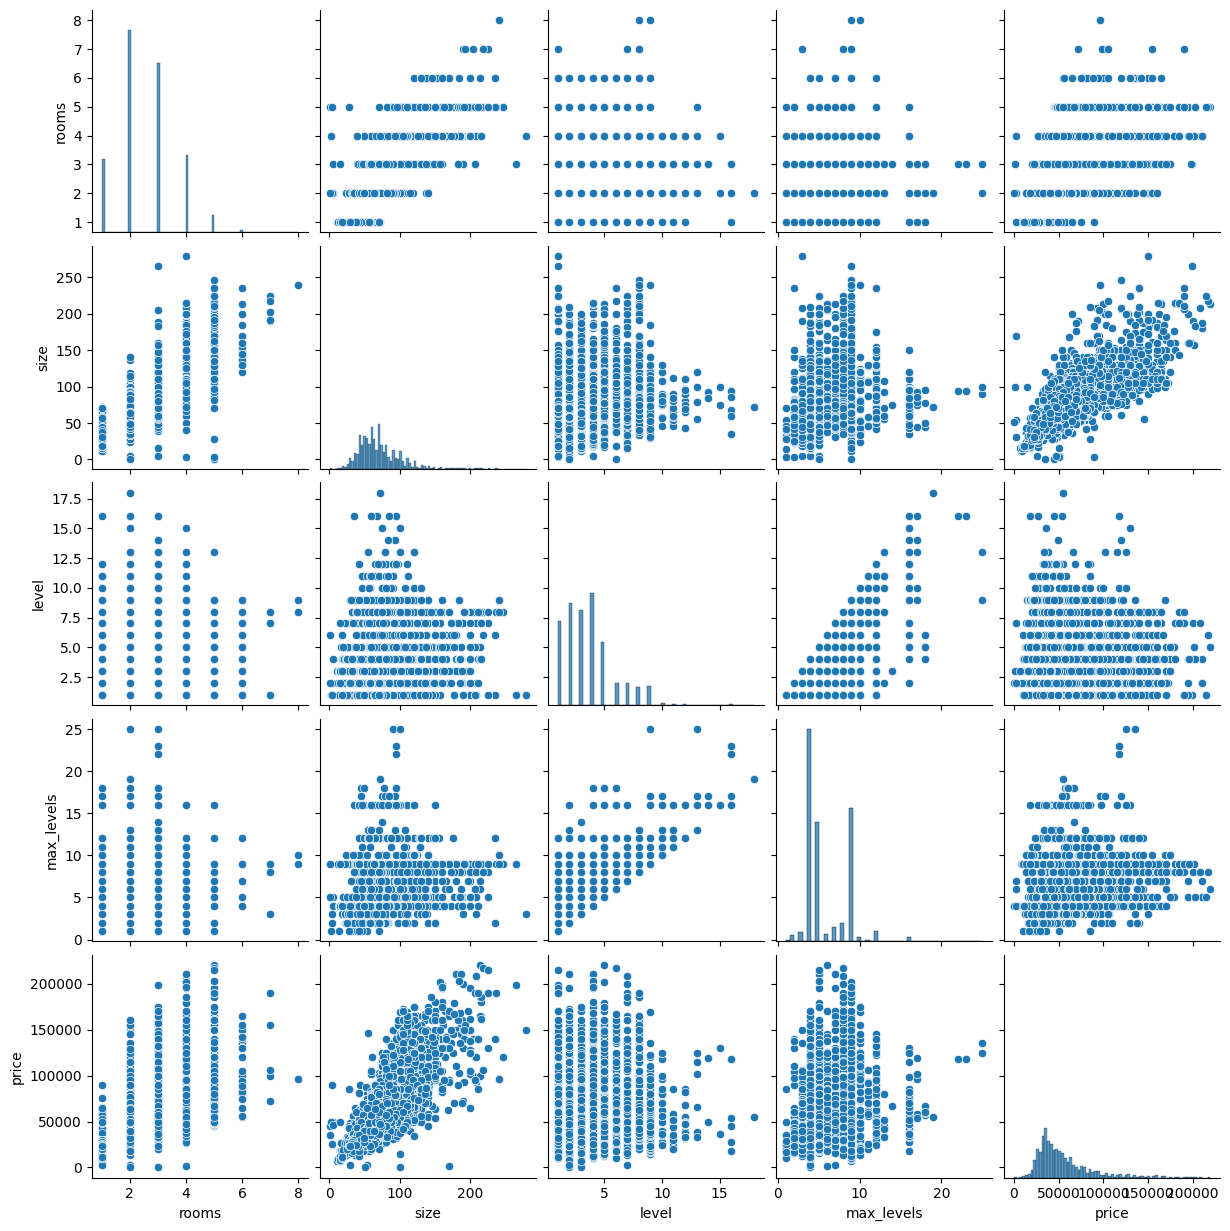

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(df[['rooms','size','level','max_levels','price']])
plt.show()

In [ ]:
# x_test = np.asanyarray(test_set[['rooms','size','level','max_levels']])
x_test = np.asanyarray(test_set[['size', 'max_levels']])
y_test = np.asanyarray(test_set[['price']])
y_predict = MLR_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7193.9223780657785
RMSE=12635.660248895361


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"

df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


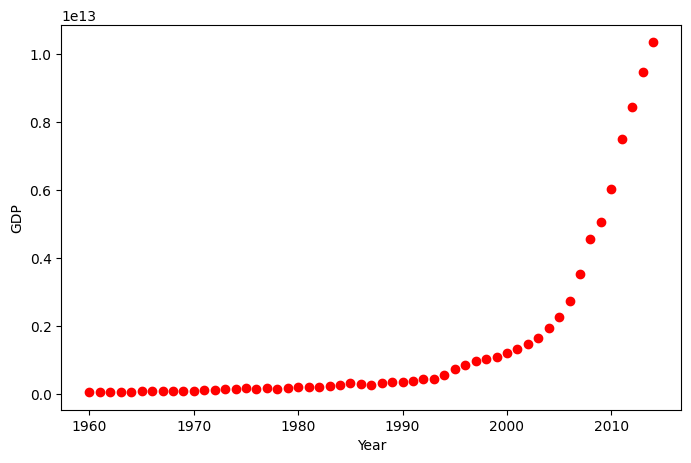

In [2]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [3]:
X = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
yhat = model.predict(X)

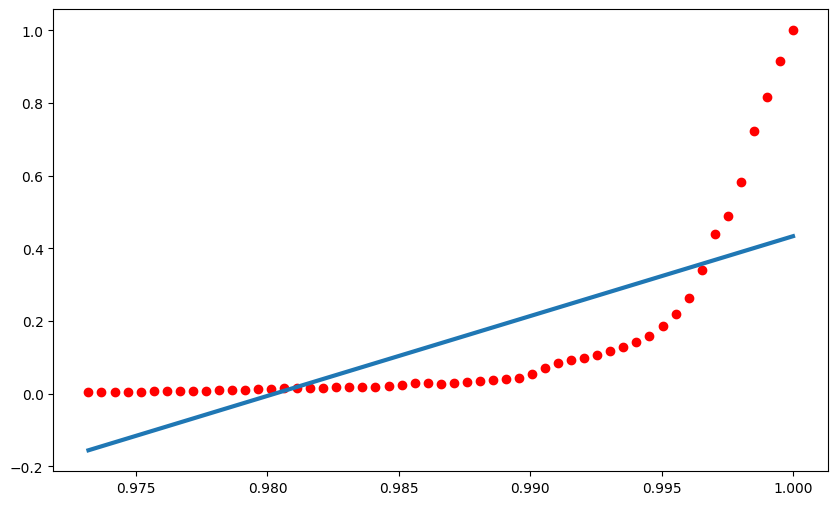

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'ro', label='fit')
plt.plot(X, yhat, linewidth=3.0, label='fit')
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(yhat, y))

MAE: 0.12657979406214762


In [10]:
X[0]

array([0.97318769])

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
model.fit(X_poly, y)

LinearRegression()

In [18]:
yhat = model.predict(X_poly)

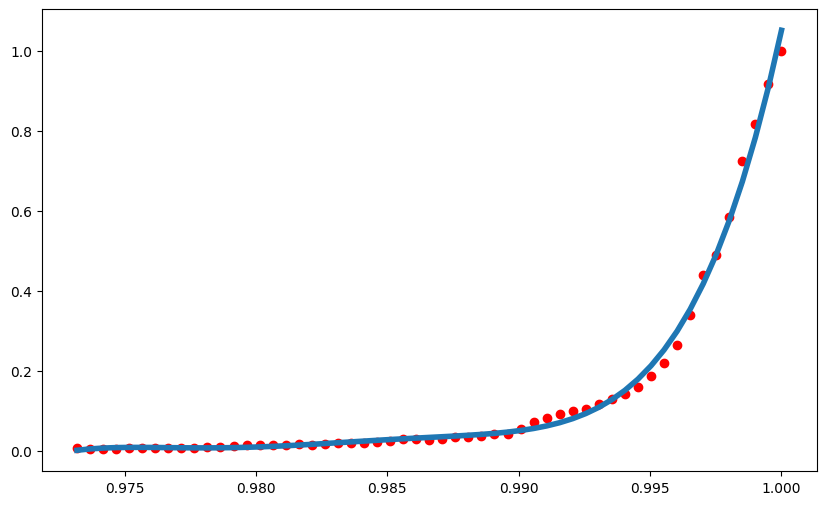

In [19]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X,yhat, linewidth=4.0, label='fit')
plt.show()

In [20]:
print("MAE:", mean_absolute_error(yhat,y))

MAE: 0.00925377235257797


In [21]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [22]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [23]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517000757071
beta2=0.9972071272403329


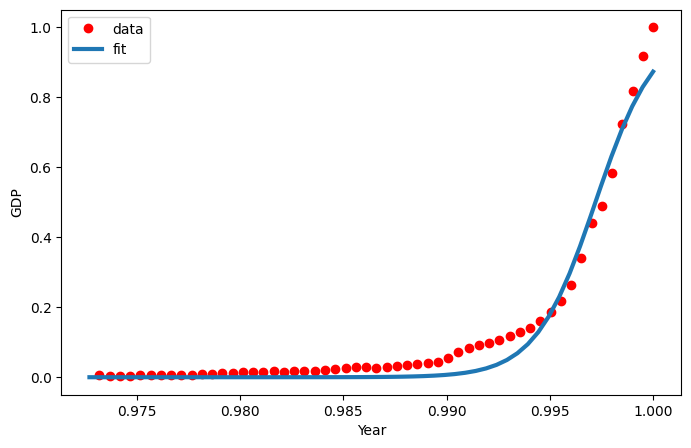

In [24]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()